In [8]:
from simuPark.park import DisneyPark
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (0.374974200206538 + 1.18610051004199 * ((x+0.5) ** 1 ) + 0.328707107843164 * ((x+0.5) ** 2 ) + -0.104475271890136 * ((x+0.5) ** 3 ) + 0.00811912062395833 * ((x+0.5) ** 4 ) + -0.00019811264586807 * ((x+0.5) ** 5 )) / 10

park = DisneyPark(
    fn = fn
)
park.start_day(max_entry_rate=150)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:31<00:00, 30.20it/s] 


38886
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['Dropper', 'Tornado', 'BumpCars', 'SlowRiver', 'StarWarsRide', 'SpaceMountain']
['Tourist']


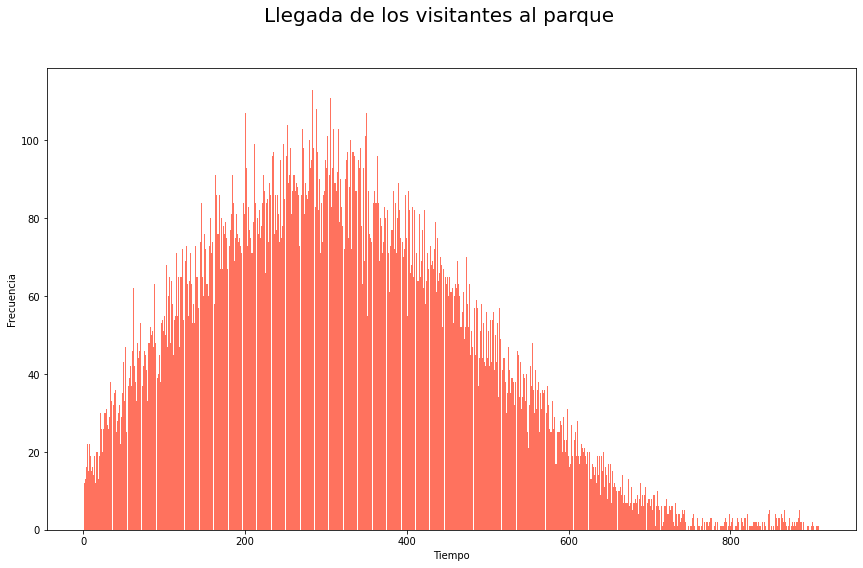

In [9]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [19]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'fastpass_used',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.fastpass_used)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
# guest_df.to_csv(r'./datasets/DFP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,fastpass_used,total_wait_time,average_wait_time
0,Tourist,1,327,326,100,14,1,147,10.500000
1,Tourist,1,390,389,95,7,1,198,28.285714
2,Tourist,1,305,304,82,3,1,23,7.666667
3,Tourist,1,449,448,119,7,0,251,35.857143
4,Tourist,1,583,582,83,5,1,108,21.600000
...,...,...,...,...,...,...,...,...,...
38881,Tourist,907,960,53,76,0,0,0,0.000000
38882,Tourist,908,960,52,39,0,0,0,0.000000
38883,Tourist,909,960,51,112,0,0,0,0.000000
38884,Tourist,910,960,50,116,0,0,0,0.000000


Atracciones experimentadas promedio: 2.455176670266934
Atracciones experimentadas desviación estandar: 2.2266254164451587


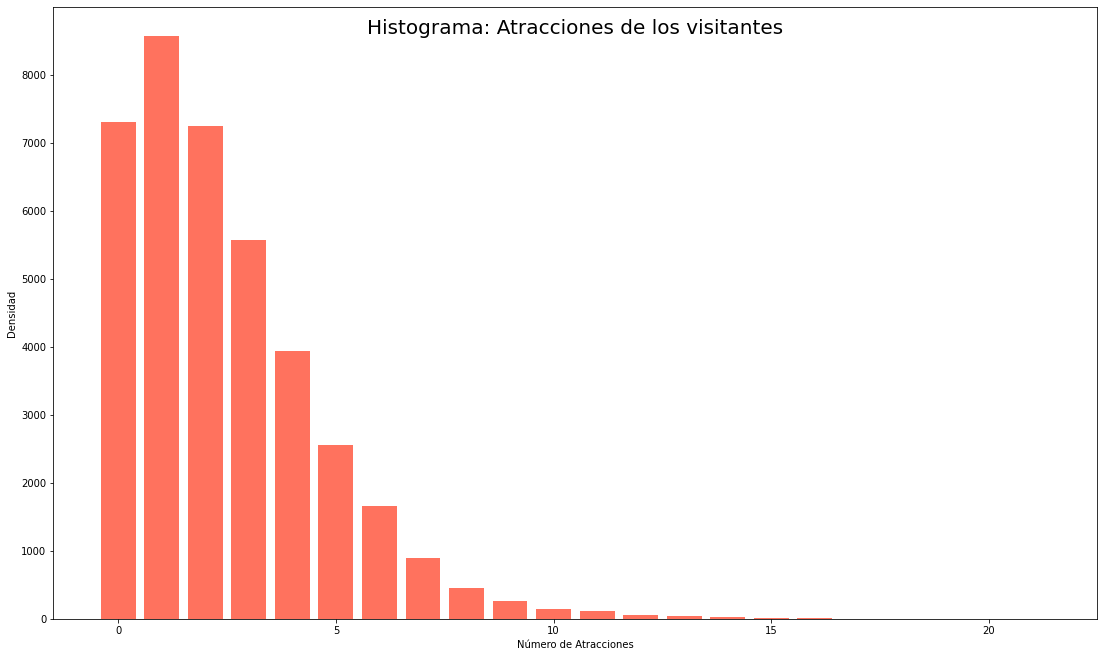

In [21]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]


for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(14.5, 8.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

45.90562366573977


Text(0, 0.5, 'Densidad')

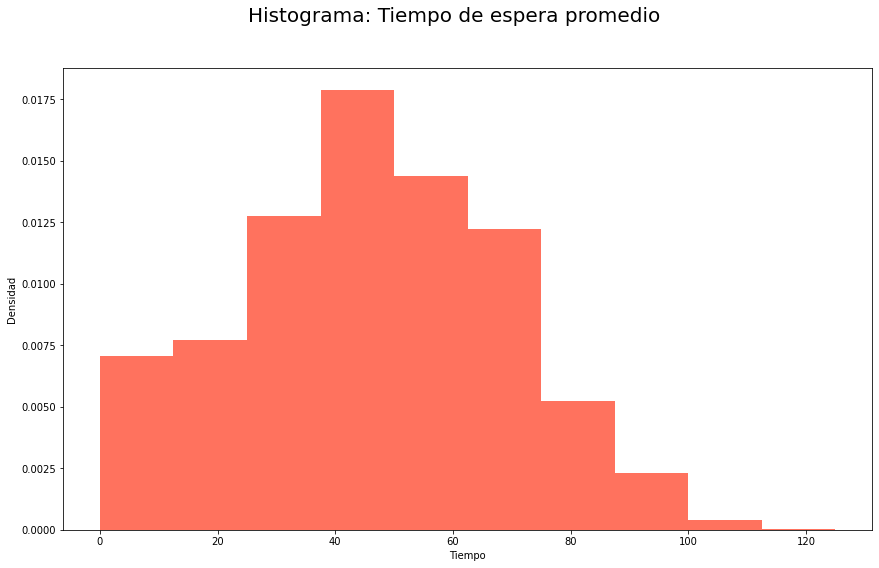

In [12]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)

print(np.mean(avgWaitTime))

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [13]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,Dropper,30
1,Tornado,30
2,BumpCars,35
3,SlowRiver,35
4,StarWarsRide,35
5,SpaceMountain,35


In [14]:
park.attractions[2].alt_queue.wait_time

0